# **Credit Risk Prediction using Loan Data**

**Author**: Yasmeen Rafique | Data Analytics Enthusiast  
📅 July 2025 | 📍 Pakistan

### **Introduction and Problem Statement**
This project aims to predict whether a loan application will be approved or not based on applicant details. It addresses a common problem faced by financial institutions: reducing the risk of loan defaults by identifying creditworthy applicants.

### **Dataset load**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [13]:
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### **Data Exploration**
- The dataset contains information on 614 applicants.
- Key features include: Gender, Married, Education, Self_Employed, ApplicantIncome, LoanAmount, Credit_History, Property_Area, and Loan_Status.
- Target variable: Loan_Status (Yes/No).

In [14]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [15]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [16]:
df.shape

(614, 13)

In [17]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [19]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


### **Data cleaning**

In [20]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [10]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [11]:
for col in df.select_dtypes(include='object').columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [12]:
for col in df.select_dtypes(include='number').columns:
    df[col].fillna(df[col].median(), inplace=True)

In [13]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### **Exploratory Data Analysis (EDA)**

##### Loan Amount prediction using histplot

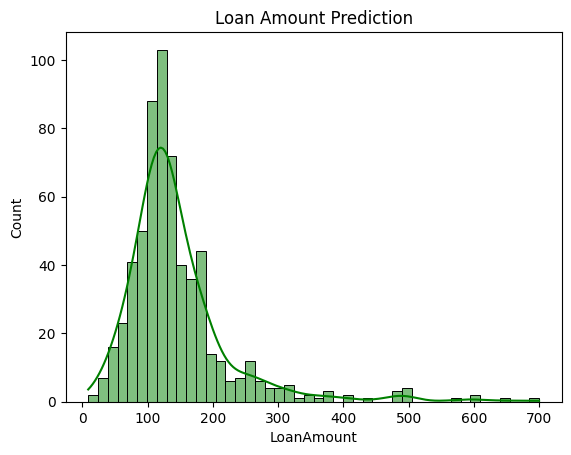

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(df['LoanAmount'],color='g',kde='True')
plt.title('Loan Amount Prediction')
plt.show()

##### Comparison Loan status vs education

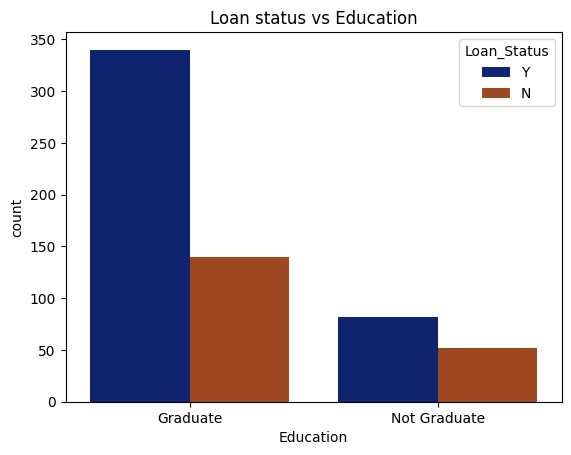

In [16]:
sns.countplot(x='Education',hue='Loan_Status',data=df,palette='dark')
plt.title('Loan status vs Education')
plt.show()

##### Loan status vs total income analysis

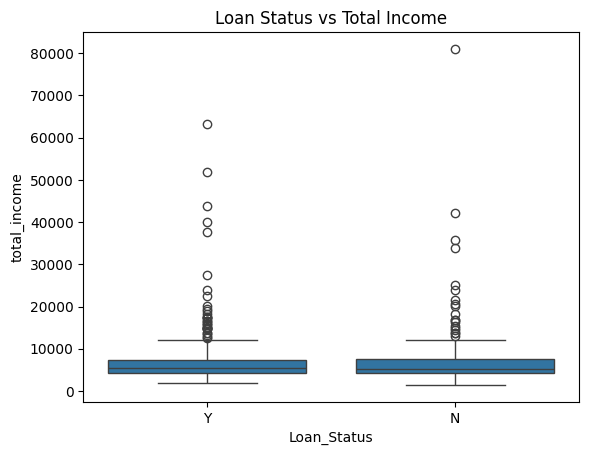

In [17]:
df['total_income'] = df['ApplicantIncome'] + df['CoapplicantIncome']
sns.boxplot(x=df['Loan_Status'],y=df['total_income'])
plt.title('Loan Status vs Total Income')
plt.show()

### **Model Training and Testing**

In [37]:
pip install scikit-learn


   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/8.7 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.7 MB ? eta -:--:--
   -- ------------------------------------- 0.5/8.7 MB 1.4 MB/s eta 0:00:07
   --- ------------------------------------ 0.8/8.7 MB 1.1 MB/s eta 0:00:08
   ------ --------------------------------- 1.3/8.7 MB 1.3 MB/s eta 0:00:06
   ------- -------------------------------- 1.6/8.7 MB 1.4 MB/s eta 0:00:06
   -------- ------------------------------- 1.8/8.7 MB 1.3 MB/s eta 0:00:06
   --------- ------------------------------ 2.1/8.7 MB 1.4 MB/s eta 0:00:05
   --------- ------------------------------ 2.1/8.7 MB 1.4 MB/s eta 0:00:05
   ---------- ----------------------------- 2.4/8.7 MB 1.2 MB/s eta 0:00:06
   ------------- -------------------------- 2.9/8.7 MB 1.3 MB/s eta 0:00:05
   -------------- ----------------------

In [18]:
import pandas as pd
df = pd.read_csv('train_u6lujuX_CVtuZ9i.csv')
df
from sklearn.preprocessing import LabelEncoder
df_model =df.copy()
le =LabelEncoder()
for col in df_model.select_dtypes(include='object').columns:
   df_model[col]=le.fit_transform(df_model[col])
X = df_model.drop(['Loan_Status','Loan_ID'],axis=1)
y = df_model['Loan_Status']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.impute import SimpleImputer

# Step 1: Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can also try 'median' or 'most_frequent'
X_imputed = imputer.fit_transform(X)

# Step 2: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=0)

# Step 3: Train Logistic Regression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)


c:\Users\E5400\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


### **Evaluation Metrics**

In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
y_pred = log_model.predict(X_test)
accuracy_score(y_test,y_pred)
confusion_matrix(y_test, y_pred)
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.83      0.45      0.59        33\n           1       0.83      0.97      0.89        90\n\n    accuracy                           0.83       123\n   macro avg       0.83      0.71      0.74       123\nweighted avg       0.83      0.83      0.81       123\n'

### **Conclusion**
- Logistic Regression gave good results with ~82% accuracy.
- Credit history and total income are strong predictors of loan approval.
- The project followed a complete ML pipeline from data cleaning to evaluation.

### 🙋‍♀️ About Me

I'm Yasmeen Rafique, a Data Analytics passionate about storytelling with data, automation, and building impactful things in data field.  
Connect with me on [LinkedIn](www.linkedin.com/in/yasmeen-rafique) or check out more projects on [GitHub](https://github.com/Yasmeenrafique).